# main process 
## generate the sample data
## use tf to fit it

In [23]:
import data
import model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
reload(data)
reload(model)

<module 'model' from 'model.py'>

train X shape (20, 1)
train y shape (20, 1)


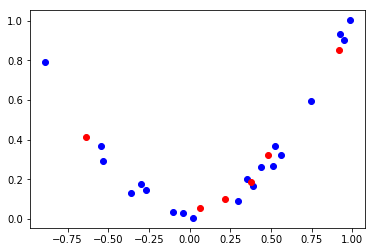

In [24]:
# generate the train and val data
m=20
reload(data)
train_X, train_y = data.sample(m)
val_X, val_y = data.sample(m/3)

#plot the sample and val data
plt.plot(train_X, train_y, "bo")
plt.plot(val_X, val_y, "ro")
print "train X shape", train_X.shape
print "train y shape", train_y.shape

In [25]:
## build the model
reload(model)
X = tf.placeholder(tf.float32, shape=(None, 1), name = "input")
y = tf.placeholder(tf.float32, shape=(None, 1), name = "output")

deep: the cost low than 0.1 epoch is 13
deep: print the graph to deepdone
shadow: the cost low than 0.1 epoch is 84
shadow: print the graph to shadowdone


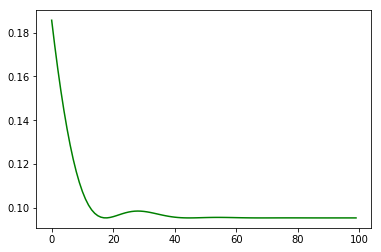

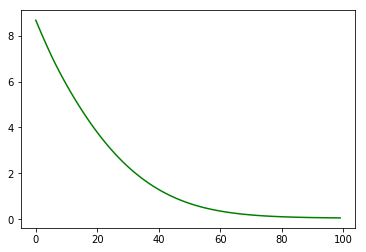

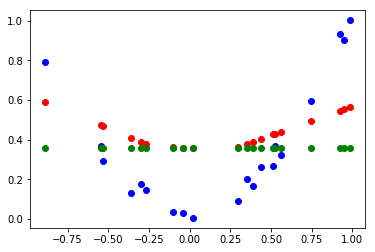

In [27]:
# run
EPOCH = 100

def get_params(sess):
    vars = tf.trainable_variables()
    return [v.name for v in vars]

def train(y_, epochs, name):
#     plt.figure()
    plt.figure()
    
    cost = tf.reduce_mean(tf.pow(y_ - y, 2))
    learning_rate = 0.01
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    sess = tf.Session()
    sess.run(init)

    learning_paths = np.empty((0, 2))
    costval = 0
    printed = False

    for epoch in range(epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})
        costval = sess.run(cost, feed_dict={X: train_X, y:train_y})
        learning_paths = np.append(learning_paths, [[epoch, costval]], axis = 0)
        if(costval < 0.1 and not printed):
            print name + ": the cost low than 0.1 epoch is", epoch
            printed = True
            
    plt.plot(learning_paths[:, 0], learning_paths[:, 1], "g", label="cost by epoch")
#     sess.run(W, feed_dict={X: train_X, y: train_y})
#     writer = tf.summary.FileWriter(name, sess.graph)
#     writer.close()
#     print name + ": print the graph to " + name  + "done"

    return costval, sess.run(y_, feed_dict={X: train_X, y:train_y}), get_params(sess)

deep_model = model.deep(model.shadow(X))
shadow_model= model.shadow(X) + model.shadow(X)
deep_cost, deep_y, deep_params = train(deep_model, EPOCH, 'deep')
shadow_cost, shadow_y, shadow_params = train(shadow_model, EPOCH, 'shadow')

# print "shadow params", shadow_params
# print "deep params", deep_params

plt.figure()
plt.plot(train_X, train_y, "bo", label= "ground truth")

# plt.figure()
plt.plot(train_X, shadow_y, "ro", label= "shadow fit")

# plt.figure()
plt.plot(train_X, deep_y, "go", label= "deep fit")

plt.show() 